retinanet发表于2018的论文"Focal Loss for Dense Object Detection"，文章指出One-stage模型精度低于two-stage模型的主要原因是one-stage模型的正负样本不均衡问题，即anchor绝大部分是负样本，因此提出一种新的loss函数focal loss来解决这个问题，并设计了一种新的one-stage模型retinanet，具有one-stage的速度与two-stage的精度。

one-stage模型中，易分样本占大多数，主导了loss函数，作者认为loss应该关注那些难分的样本，因此focal loss的意义在于抑制易分样本对loss的贡献。

传统的binary cross entropy loss可定义如下：
$$
CE(p,y) = 
\begin {cases}
-log(p), if y=1 \\
-log(1-p), otherwise
\end {cases}
$$
令：
$$
p_t = 
\begin {cases}
p, if y=1 \\
1-p, otherwise
\end {cases}
$$
则binary cross entropy loss可重写为：
$$
CE(p, y) = CE(p_t)=-log(p_t)
$$

balanced cross entropy可写为：
$$
CE(p,y) = 
\begin {cases}
-\alpha log(p), if y=1 \\
-(1-\alpha)log(1-p), otherwise
\end {cases}
$$
即：
$$
CE(p_t) = -\alpha_tlog(p_t)
$$

focal loss形式为：
$$
FL(p_t) = -(1-p_t)^{gamma}log(p_t)
$$
$其中，\gamma为参数，(1-p_t)^{gamma}为调制因子。当p_t很大时（易分样本），如\\p_t=0.968，若\gamma=2，则调制因子为(1-0.968)^2 \approx 0.001，loss减少为原来的\\1000倍，达到了抑制易分样本的目的$<br/>
一般在应用时，会用到另一个版本的focal loss:
$$
FL(p_t) = -\alpha_t(1-p_t)^{\gamma}log(p_t)
$$
$一般\alpha与\gamma的值是一块调，\gamma增大时\alpha减小，文中在\gamma=2,\alpha=0.25时效果最好$

focal loss的曲线如下，可以看到，当$\gamma$越来越大时，易分样本的loss接近于0
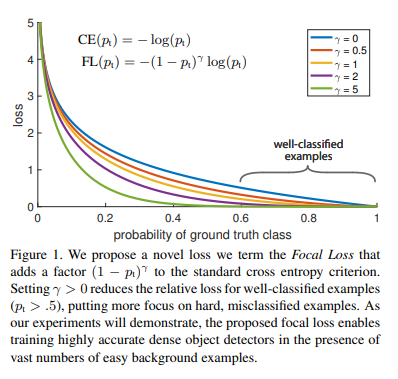

模型初始化：<br/>
对于二分类模型，其初始化方式决定了模型输出正负类的概率是相等的，然而这对于类别不均衡的情况，数量多的类会占据loss的主要部分。因此，作者在初始化分类子网络的最后一层时，其bias初始化为$b=-log((1-\pi)/\pi)，其中\pi设为0.01$

retinanet<br/>
作者提出一种简洁的one-stage loss，并应用focal loss，以此来测试focal loss的效果。retinanet架构如下。基础网络采用resnet，并用FPN来做特征融合，后接一个分类子网络与一个回归子网络。anchor机制与FPN论文中的设置类似，在anchor尺寸上稍有差异。回归时采用class-agnostic的方式，即一个anchor只输出一个位置，而不是每个类输出一个位置。 
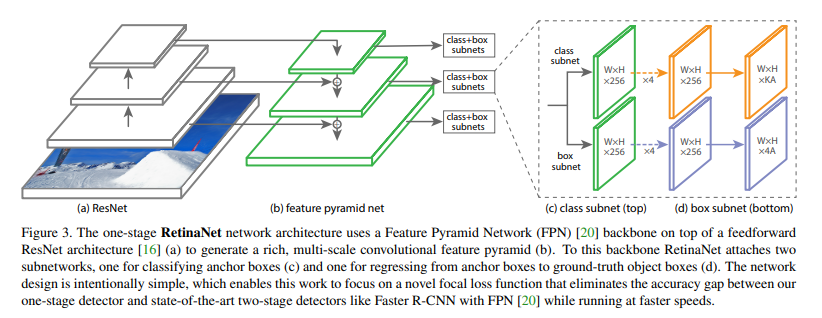

作者在实验中发现，随着$\gamma$的增大，正样本（前景）的loss受影响不大，而对于负样本（背景），易分负样本受到明显的抑制，如下图。
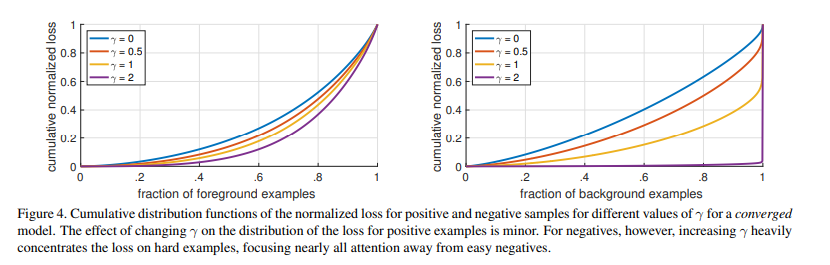

值得一提的是，focal loss的形式并不唯一，作者给出了其他几种focal loss的形式，同样能达到类似的效果。